In [1]:
import tensorflow as tf
import numpy as np
import sys
import matplotlib.pyplot as plt
import random
import mxnet as mx
from mxnet import gluon
from mxnet import ndarray as nd
from mxnet.gluon import nn, utils
from mxnet import autograd


/home/alexchen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
a = iter(x)
for i in a:
    first = i
    second = next(a, first)
    third = next(a,first)
    four = next(a, first)
    print(first)
    print(second)
    print(third)
    print(four)
    print("----")
    

1
2
3
4
----
5
6
7
8
----
9
10
9
9
----


In [3]:
from itertools import tee
def pairwise(iterable):
    "s -> (s0,s1,s2,s3), (s1,s2,s3,s4), (s2, s3,s4,s5), ..."
    a, b, c, d = tee(iterable, n=4)
    next(b, None)
    return zip(a, b)

In [4]:
batch_size = 128
n_mixture = 8
std = 0.025
radius = 1.0
latent_z_size =100
epochs = 5000

use_gpu = True
ctx = mx.gpu() if use_gpu else mx.cpu()

lr = 0.00002
beta1 = 0.5
dropout = 0.5

unroll_steps = 4

In [5]:
thetas = np.linspace(0, 2 * np.pi - 2 * np.pi / n_mixture, n_mixture)
centers = []
for i in range(0, len(thetas)):
    centers.append([radius * np.sin(thetas[i]), radius * np.cos(thetas[i])])
samples = []
for c in centers:
    samples.extend(np.random.normal(loc=c, scale=std, size=[8192, 2]).tolist())
#for s in range(len(samples)):
#    samples[s] = tf.convert_to_tensor(samples[s])
#for z in range(len(samples)):
#   samples[z] = [samples[z]]

#test output shape    
#o = np.array(samples)
#print(o.shape)
    
random.shuffle(samples)
samples = np.asarray(samples)
print(samples)
#print(samples.T[0:3])
train_data = mx.io.NDArrayIter(data = samples, batch_size = batch_size)

[[ 0.68264133 -0.75261707]
 [-0.72097379  0.70015745]
 [-0.67204088 -0.73111844]
 ...
 [ 0.9702702   0.00563791]
 [-1.04096864  0.00182482]
 [ 0.68699656  0.71437265]]


65536
2
[[ 0.68264133 -0.72097379 -0.67204088 ...  0.9702702  -1.04096864
   0.68699656]
 [-0.75261707  0.70015745 -0.73111844 ...  0.00563791  0.00182482
   0.71437265]]


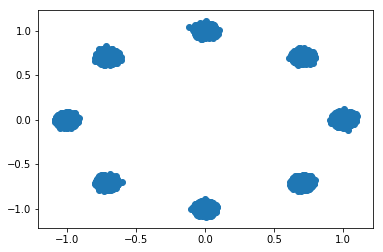

In [6]:
print(len(samples))
print(len(samples[0]))
#print(len(samples[0][0]))
print(samples.T)

x= samples.T[0]
y = samples.T[1]
plt.scatter(x,y)

In [7]:
netG = nn.Sequential()
with netG.name_scope():
    
    #Convolutional
    #initially 128 x 100 x 2
#     netG.add(nn.Conv1DTranspose(50, 4, in_channels = 100, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     # should now be 128 x 50 x 2
#     netG.add(nn.Conv1DTranspose(25, 4, in_channels = 50, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     # should still be 128 x 25 x 2
#     netG.add(nn.Conv1DTranspose(5, 4, in_channels = 25, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     #should still be 128 x 5 x 2
#     netG.add(nn.Conv1DTranspose(2, 4,  in_channels = 5, padding = 2, strides =2))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Activation('relu'))
#     #should still be 128 x 2 x 2
#     netG.add(nn.Conv1DTranspose(1, 4,  in_channels = 2, padding = 2, strides =2))
#     netG.add(nn.LeakyReLU(0.2))
#     #should still be 128 x 1 x 2
    
    
#     #Dense
#     #initially 128 x 100 x 2
#     netG.add(nn.Dense(400))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.LeakyReLU(0.2))
#     netG.add(nn.Dropout(0.5))
#     #netG.add(nn.Dense(640))
#     #netG.add(nn.LeakyReLU(0.2))
#     netG.add(nn.Dense(400))
#     netG.add(nn.BatchNorm())
#     netG.add(nn.Dropout(0.5))
#     #netG.add(nn.LeakyReLU(0.2))
#     netG.add(nn.Dense(2))



    #Try three smh
    netG.add(nn.Dense(128, activation = "tanh"))
    netG.add(nn.Dense(128, activation = "tanh"))
    netG.add(nn.Dense(2))
    
    

In [8]:
netD1 = nn.Sequential()
with netD1.name_scope():
    
    #Convolutional
    #input is 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
#     # should still be 256 x 1 x 1


#     #Dense
#     netD1.add(nn.Dense(200))
#     netD1.add(nn.Dropout(0.5))
#     netD1.add(nn.LeakyReLU(0.2))
#     #netD.add(nn.Dense(100))
#     #netD.add(nn.LeakyReLU(0.2))
#     netD1.add(nn.Dense(200))
#     netD1.add(nn.LeakyReLU(0.2))
#     #netD.add(nn.Dropout(0.5))
#     netD1.add(nn.Dense(1))
    
    
    
    #Try three smh
    
    netD1.add(nn.Dense(128, activation = "tanh"))
    netD1.add(nn.Dense(128, activation = "tanh"))
    netD1.add(nn.Dense(1))

In [9]:
netD2 = nn.Sequential()
with netD2.name_scope():
    
    #Convolutional
    #input is 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, padding = 2, in_channels = 1))
#     netD.add(nn.BatchNorm())
#     netD.add(nn.LeakyReLU(0.2))
#     # should still be 256 x 1 x 2
#     netD.add(nn.Conv1D(channels = 1, kernel_size = 5, strides = 2,padding = 2, in_channels = 1))
#     # should still be 256 x 1 x 1


#     #Dense
#     netD2.add(nn.Dense(256))
#     netD2.add(nn.Dropout(0.5))
#     netD2.add(nn.LeakyReLU(0.2))
#     #netD.add(nn.Dense(100))
#     #netD.add(nn.LeakyReLU(0.2))
#     netD2.add(nn.Dense(200))
#     netD2.add(nn.LeakyReLU(0.2))
#     #netD.add(nn.Dropout(0.5))
#     netD2.add(nn.Dense(1))



    #Try three smh
    netD2.add(nn.Dense(128, activation = "tanh"))
    netD2.add(nn.Dense(128, activation = "tanh"))
    netD2.add(nn.Dense(1))
    
    

In [10]:
loss = gluon.loss.SigmoidBinaryCrossEntropyLoss()

netG.initialize(mx.init.Normal(0.1), ctx = ctx)
netD1.initialize(mx.init.Normal(0.1), ctx = ctx)
netD2.initialize(mx.init.Normal(0.1), ctx = ctx)

trainerG = gluon.Trainer(netG.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
trainerD1 = gluon.Trainer(netD1.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
trainerD2 = gluon.Trainer(netD2.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})
#unrolledtrainerD = gluon.Trainer(netD.collect_params(), 'adam', {'learning_rate': lr, 'beta1':beta1})


Begin


INFO:root:
binary training acc at epoch 0: facc=0.590500
INFO:root:time: 1.642484
INFO:root:time: 1.642939


Epoch: 0
epoch 0
Plot 0


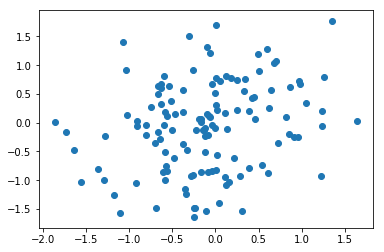

Plot 1


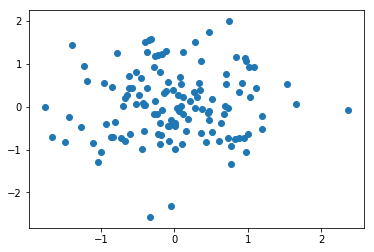

Plot 2


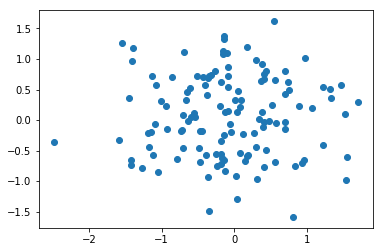

Plot 3


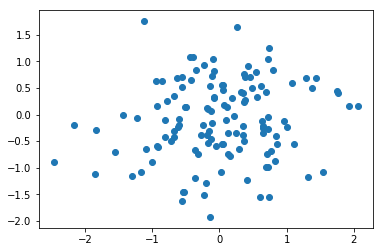

Plot 4


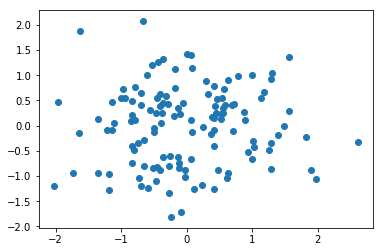


[[ 1.1313196  -0.5018609 ]
 [-0.7878424  -0.5329625 ]
 [ 0.9082681  -0.05127469]
 ...
 [-0.69578856  0.4117488 ]
 [-0.83438784 -0.7331788 ]
 [ 0.5925869   0.40959117]]
<NDArray 768x2 @gpu(0)>
Epoch: 100


INFO:root:
binary training acc at epoch 200: facc=0.739082
INFO:root:time: 1.683062
INFO:root:time: 1.683528


Epoch: 200
epoch 200
Plot 0


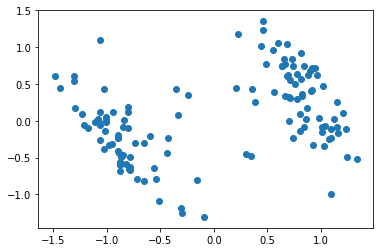

Plot 1


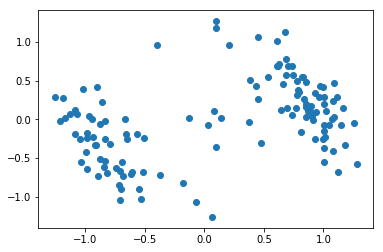

Plot 2


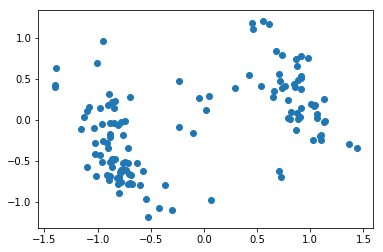

Plot 3


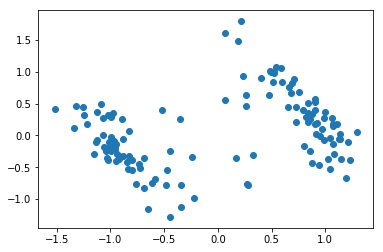

Plot 4


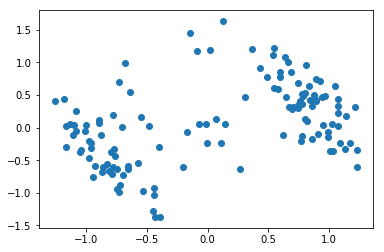


[[-0.97525656 -0.03439571]
 [-0.26091725 -1.0789895 ]
 [ 0.8669097   0.28581345]
 ...
 [-0.0669363   0.05345113]
 [-0.8151447  -0.66404194]
 [ 0.99265915 -0.13986649]]
<NDArray 768x2 @gpu(0)>
Epoch: 300


INFO:root:
binary training acc at epoch 400: facc=0.740334
INFO:root:time: 2.318700
INFO:root:time: 2.319150


Epoch: 400
epoch 400
Plot 0


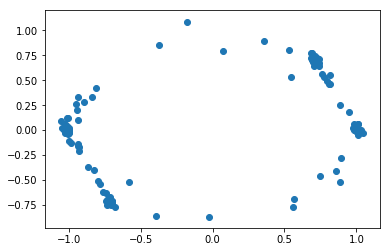

Plot 1


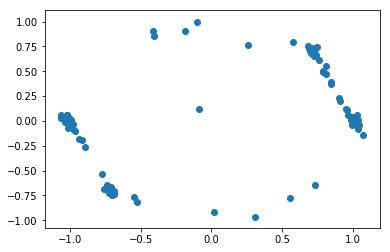

Plot 2


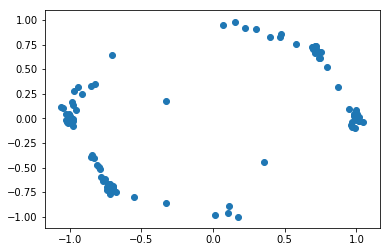

Plot 3


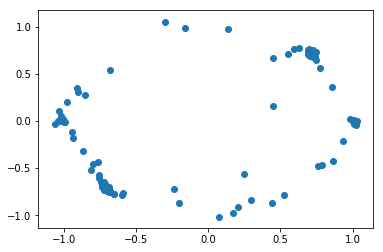

Plot 4


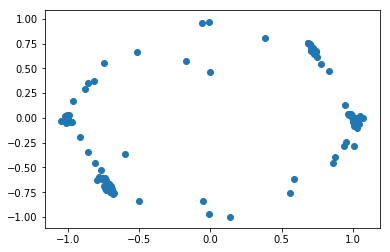


[[-1.0270625   0.04356458]
 [-0.7023285  -0.70543134]
 [ 0.91387963  0.19767033]
 ...
 [ 1.0172292  -0.01873738]
 [-0.7043108  -0.7238614 ]
 [ 1.0123028  -0.00909353]]
<NDArray 768x2 @gpu(0)>
Epoch: 500


INFO:root:
binary training acc at epoch 600: facc=0.743500
INFO:root:time: 1.678054
INFO:root:time: 1.678529


Epoch: 600
epoch 600
Plot 0


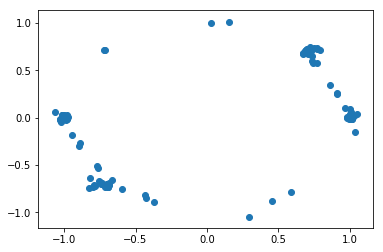

Plot 1


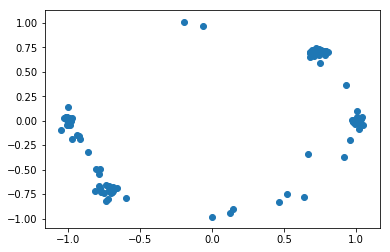

Plot 2


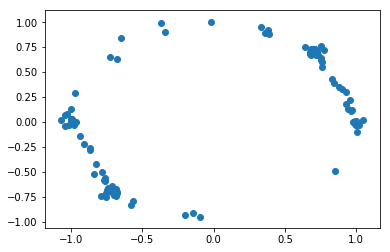

Plot 3


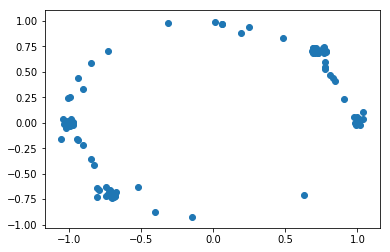

Plot 4


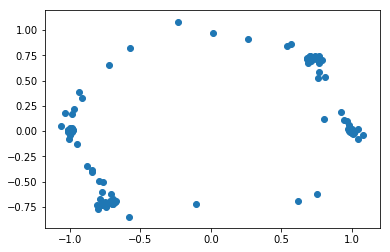


[[-0.36940435  0.80648816]
 [-0.7097399  -0.6960476 ]
 [ 0.7040745   0.7078831 ]
 ...
 [-0.74262035 -0.7403033 ]
 [-0.58291066 -0.84475034]
 [ 0.7579067   0.5264806 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 700


INFO:root:
binary training acc at epoch 800: facc=0.744148
INFO:root:time: 1.596652
INFO:root:time: 1.602741


Epoch: 800
epoch 800
Plot 0


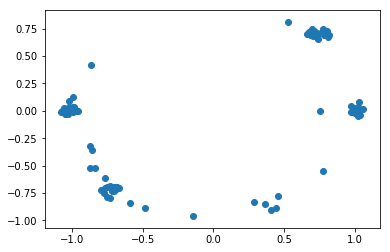

Plot 1


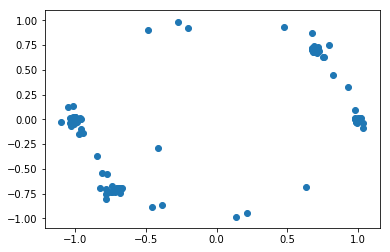

Plot 2


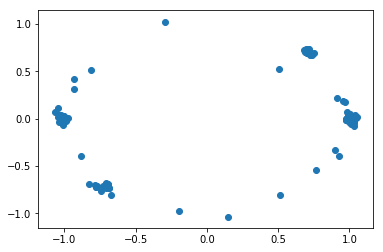

Plot 3


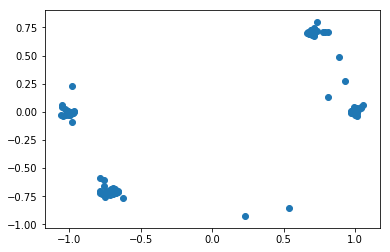

Plot 4


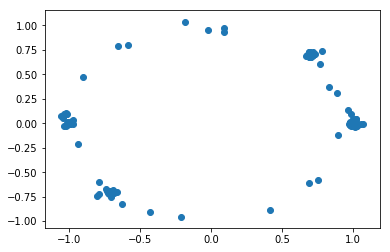


[[ 0.69657254  0.6934511 ]
 [-0.7065221  -0.7121948 ]
 [ 0.59371907  0.78529537]
 ...
 [ 0.7067653   0.69749993]
 [-0.7398185  -0.6713683 ]
 [ 0.88910383  0.30997798]]
<NDArray 768x2 @gpu(0)>
Epoch: 900


INFO:root:
binary training acc at epoch 1000: facc=0.745338
INFO:root:time: 1.594897
INFO:root:time: 1.595466


Epoch: 1000
epoch 1000
Plot 0


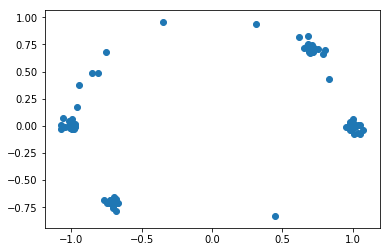

Plot 1


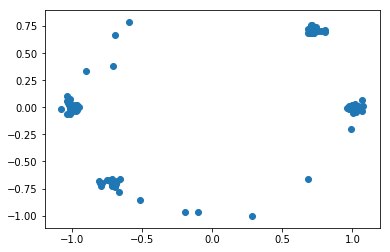

Plot 2


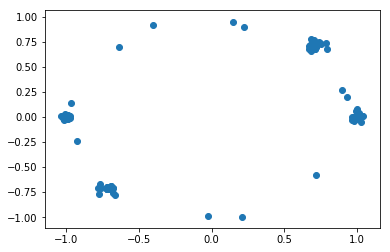

Plot 3


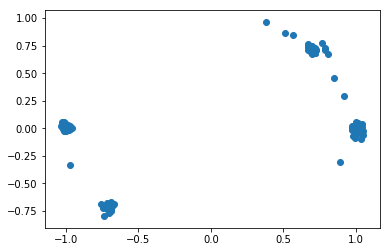

Plot 4


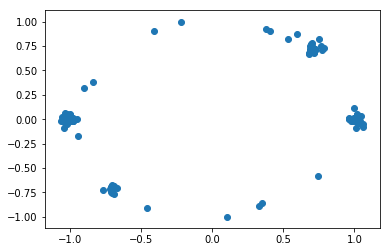


[[ 0.6087662   0.81059986]
 [ 0.7054857   0.71197116]
 [ 0.7623404   0.71433806]
 ...
 [-0.6688744  -0.7041847 ]
 [ 0.96359694 -0.00258532]
 [ 0.6948653   0.75718796]]
<NDArray 768x2 @gpu(0)>
Epoch: 1100


INFO:root:
binary training acc at epoch 1200: facc=0.745949
INFO:root:time: 1.688327
INFO:root:time: 1.688879


Epoch: 1200
epoch 1200
Plot 0


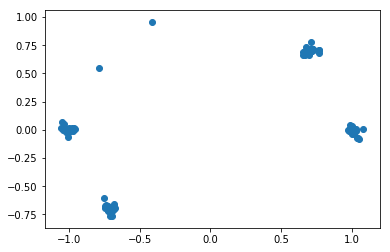

Plot 1


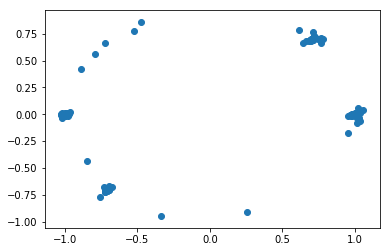

Plot 2


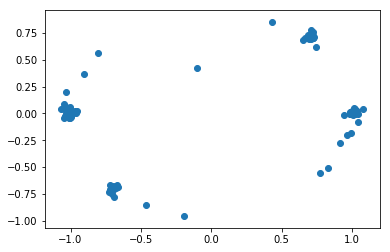

Plot 3


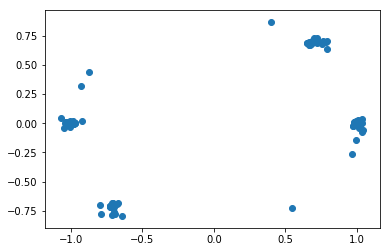

Plot 4


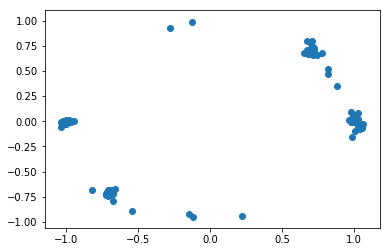


[[-0.7082493  -0.7184706 ]
 [-0.7106213  -0.6947124 ]
 [ 0.6848843   0.786967  ]
 ...
 [-0.70614004 -0.7032139 ]
 [-0.68011165 -0.68945146]
 [ 0.70027274  0.7665447 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1300


INFO:root:
binary training acc at epoch 1400: facc=0.746117
INFO:root:time: 1.702891
INFO:root:time: 1.703476


Epoch: 1400
epoch 1400
Plot 0


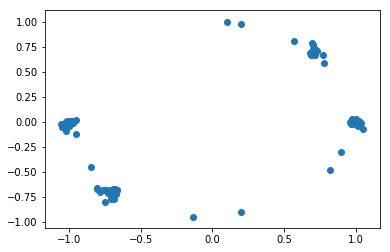

Plot 1


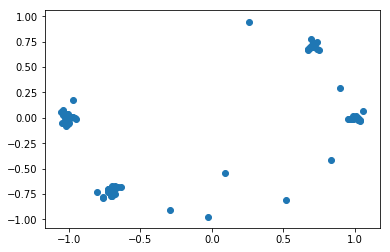

Plot 2


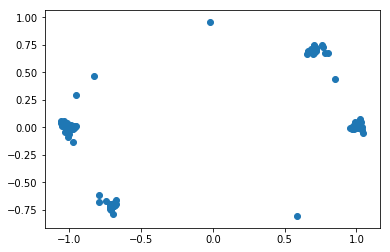

Plot 3


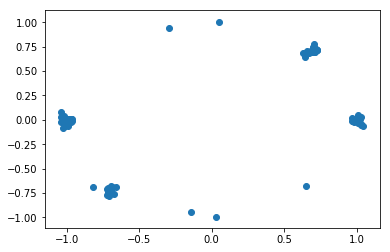

Plot 4


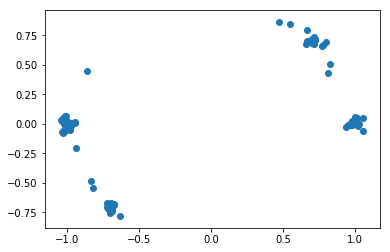


[[-0.695433   -0.71134645]
 [ 0.7060674   0.765737  ]
 [ 1.0226461   0.00732294]
 ...
 [-0.68328243 -0.67630833]
 [ 0.70558506  0.7210337 ]
 [-0.99411136  0.0071418 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1500


INFO:root:
binary training acc at epoch 1600: facc=0.746529
INFO:root:time: 2.193090
INFO:root:time: 2.195097


Epoch: 1600
epoch 1600
Plot 0


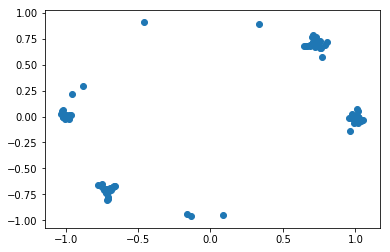

Plot 1


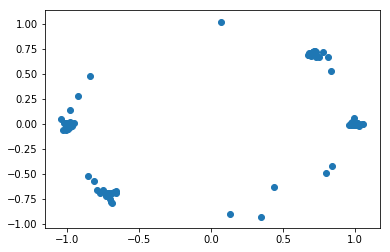

Plot 2


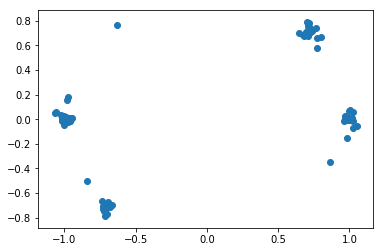

Plot 3


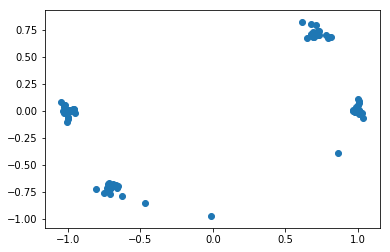

Plot 4


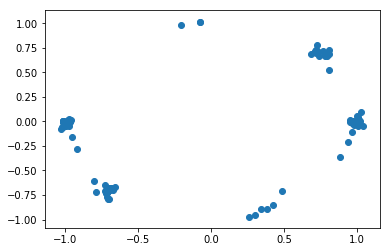


[[-0.9859494   0.00228578]
 [-0.98364186 -0.00873047]
 [ 0.72021973  0.7163505 ]
 ...
 [-0.685003   -0.6808377 ]
 [ 1.009484    0.0402295 ]
 [-0.7146441  -0.706145  ]]
<NDArray 768x2 @gpu(0)>
Epoch: 1700


INFO:root:
binary training acc at epoch 1800: facc=0.746674
INFO:root:time: 1.924840
INFO:root:time: 1.929855


Epoch: 1800
epoch 1800
Plot 0


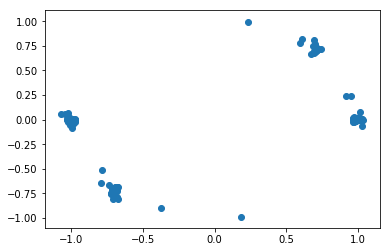

Plot 1


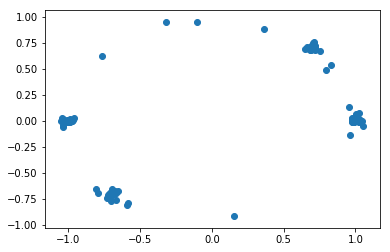

Plot 2


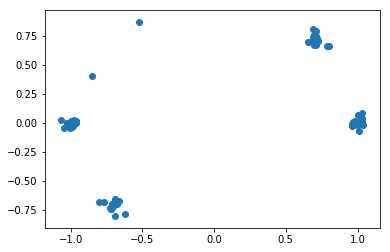

Plot 3


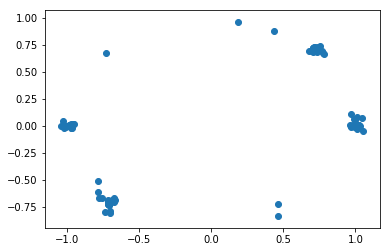

Plot 4


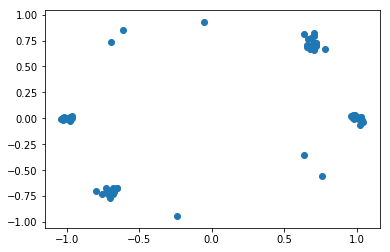


[[ 9.8320711e-01 -3.0959398e-04]
 [ 1.0099570e+00 -3.2733157e-03]
 [ 9.6992910e-01  7.5875968e-04]
 ...
 [ 7.1761066e-01  7.2349006e-01]
 [ 7.0469987e-01  7.9284102e-01]
 [ 7.0349073e-01  6.9982278e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 1900


INFO:root:
binary training acc at epoch 2000: facc=0.746895
INFO:root:time: 1.943511
INFO:root:time: 1.943946


Epoch: 2000
epoch 2000
Plot 0


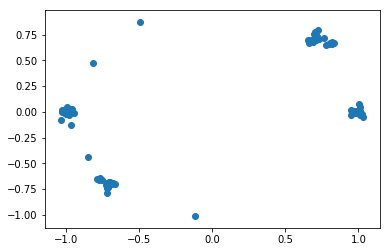

Plot 1


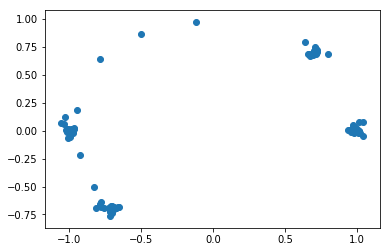

Plot 2


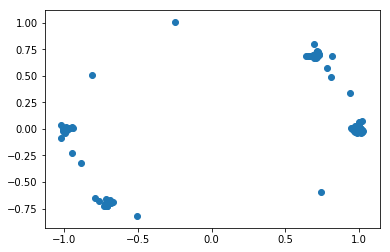

Plot 3


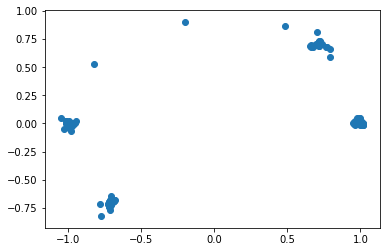

Plot 4


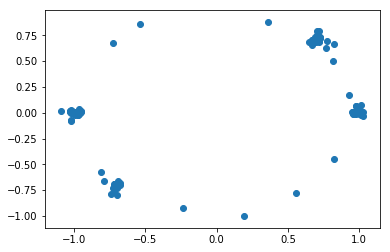


[[-0.9671508  -0.16120547]
 [ 0.7119704   0.69770896]
 [-0.7186659  -0.7267343 ]
 ...
 [-0.81188303 -0.5758007 ]
 [ 0.9595184  -0.00380772]
 [-0.6967123  -0.72509307]]
<NDArray 768x2 @gpu(0)>
Epoch: 2100


INFO:root:
binary training acc at epoch 2200: facc=0.747131
INFO:root:time: 2.805150
INFO:root:time: 2.805837


Epoch: 2200
epoch 2200
Plot 0


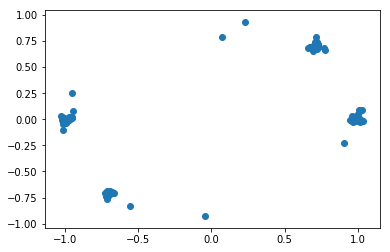

Plot 1


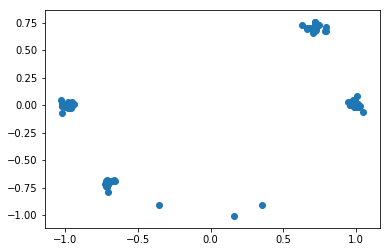

Plot 2


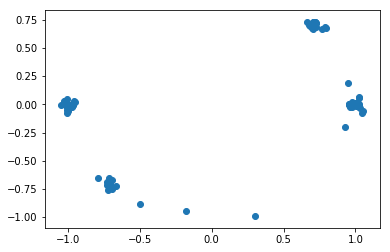

Plot 3


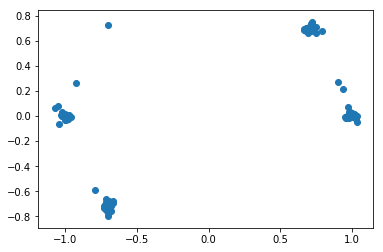

Plot 4


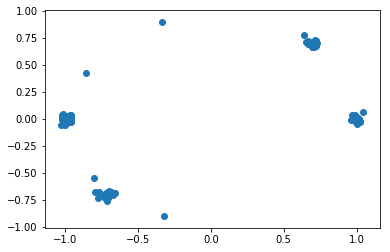


[[ 0.7058441   0.7078173 ]
 [-0.71180326 -0.7351109 ]
 [ 0.7190872   0.7145538 ]
 ...
 [-0.7121364  -0.7275901 ]
 [ 0.7140064   0.7218463 ]
 [ 0.9985376  -0.00839586]]
<NDArray 768x2 @gpu(0)>
Epoch: 2300


INFO:root:
binary training acc at epoch 2400: facc=0.747368
INFO:root:time: 1.912877
INFO:root:time: 1.913637


Epoch: 2400
epoch 2400
Plot 0


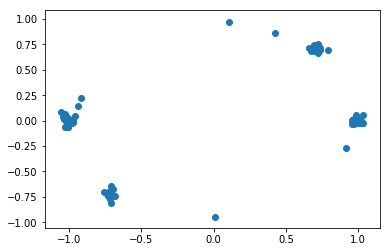

Plot 1


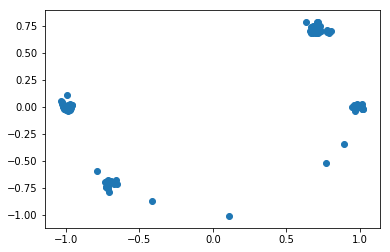

Plot 2


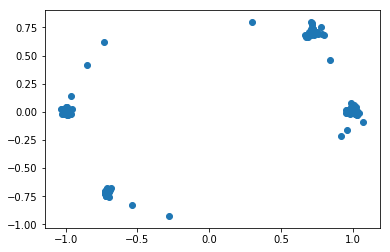

Plot 3


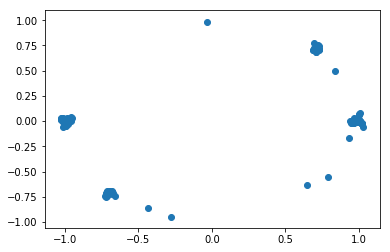

Plot 4


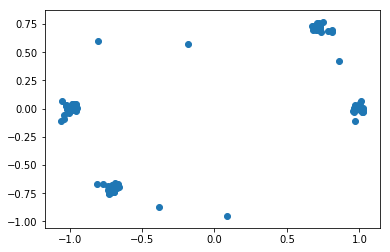


[[-1.0091423   0.0010213 ]
 [ 0.7154651   0.7620858 ]
 [-0.7251421  -0.70805407]
 ...
 [-0.66896707 -0.6684708 ]
 [-0.70143884 -0.6983355 ]
 [ 0.9896122  -0.00145783]]
<NDArray 768x2 @gpu(0)>
Epoch: 2500


INFO:root:
binary training acc at epoch 2600: facc=0.747269
INFO:root:time: 2.360231
INFO:root:time: 2.360661


Epoch: 2600
epoch 2600
Plot 0


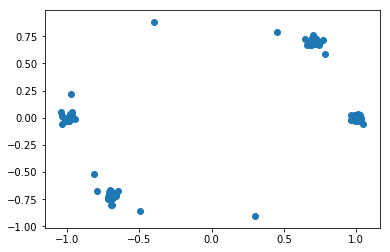

Plot 1


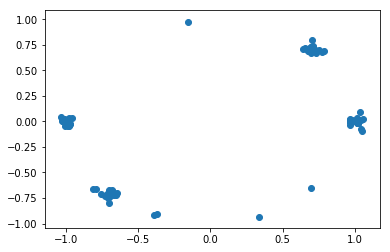

Plot 2


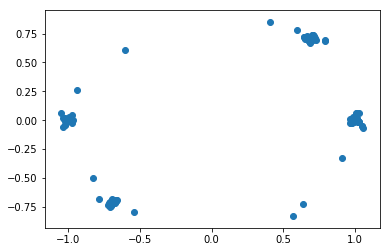

Plot 3


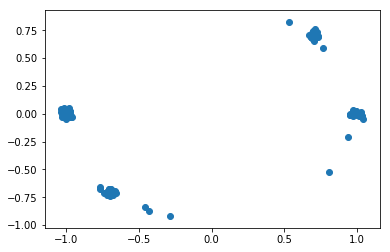

Plot 4


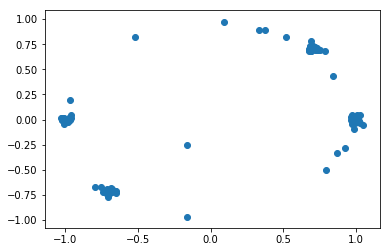


[[ 1.0142027  -0.01927079]
 [-0.70641875 -0.71802294]
 [-0.69836587 -0.69908476]
 ...
 [ 0.7203141   0.7046926 ]
 [-0.69439596 -0.70566213]
 [ 0.9646217  -0.00645395]]
<NDArray 768x2 @gpu(0)>
Epoch: 2700


INFO:root:
binary training acc at epoch 2800: facc=0.747589
INFO:root:time: 1.716064
INFO:root:time: 1.716573


Epoch: 2800
epoch 2800
Plot 0


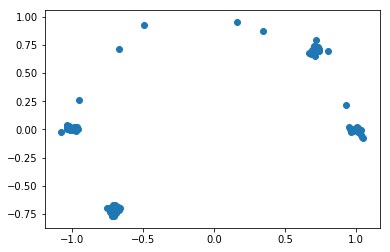

Plot 1


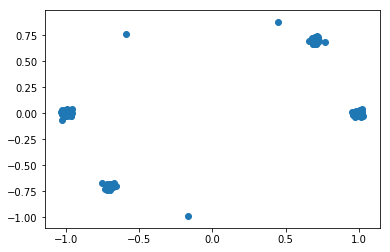

Plot 2


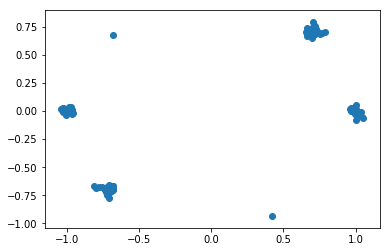

Plot 3


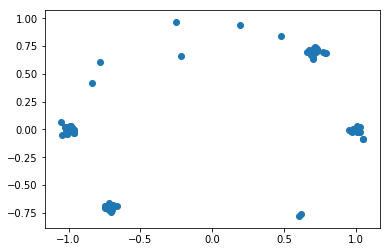

Plot 4


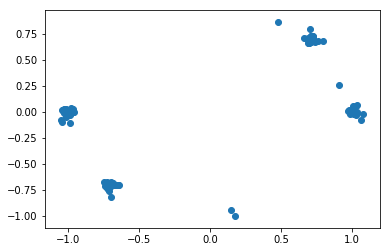


[[ 0.7176116   0.7318218 ]
 [ 1.0041283   0.00947205]
 [-0.82677656 -0.66404366]
 ...
 [-0.6965568  -0.8231969 ]
 [-0.710333   -0.7604505 ]
 [ 0.7146005   0.7268534 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 2900


INFO:root:
binary training acc at epoch 3000: facc=0.747437
INFO:root:time: 1.731669
INFO:root:time: 1.732094


Epoch: 3000
epoch 3000
Plot 0


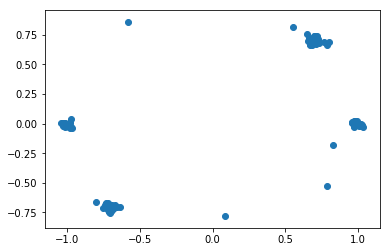

Plot 1


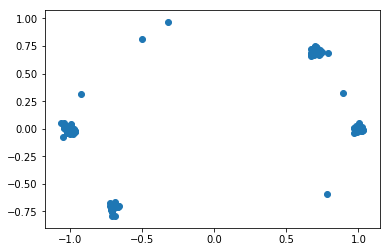

Plot 2


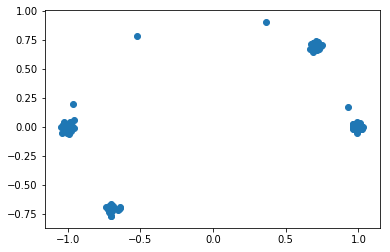

Plot 3


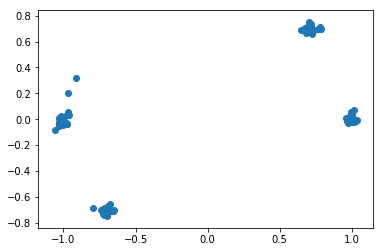

Plot 4


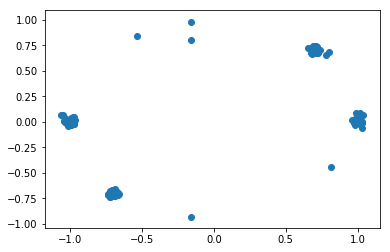


[[-0.9973926   0.02244169]
 [ 0.7044155   0.7314003 ]
 [ 1.0293709  -0.01300703]
 ...
 [ 0.99353504 -0.00568085]
 [ 0.7157356   0.73150975]
 [-0.9892287   0.00279177]]
<NDArray 768x2 @gpu(0)>
Epoch: 3100


INFO:root:
binary training acc at epoch 3200: facc=0.747719
INFO:root:time: 1.729021
INFO:root:time: 1.729414


Epoch: 3200
epoch 3200
Plot 0


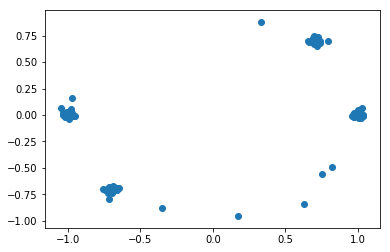

Plot 1


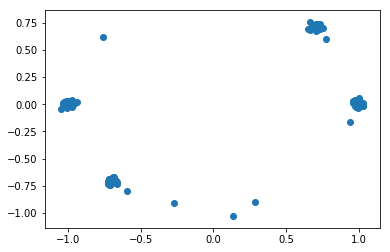

Plot 2


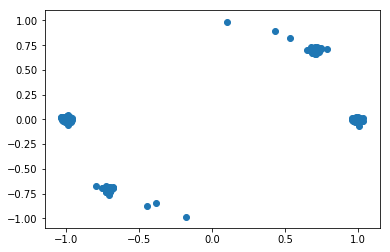

Plot 3


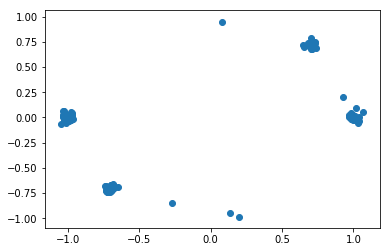

Plot 4


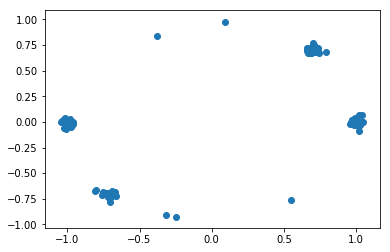


[[-0.66301703 -0.6991884 ]
 [-0.97415257  0.00494481]
 [ 0.97107726 -0.02100812]
 ...
 [-1.0252682   0.01948829]
 [ 0.70453924  0.7343788 ]
 [-0.6676658  -0.6874083 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 3300


INFO:root:
binary training acc at epoch 3400: facc=0.747818
INFO:root:time: 1.708069
INFO:root:time: 1.708592


Epoch: 3400
epoch 3400
Plot 0


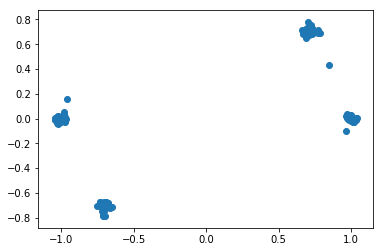

Plot 1


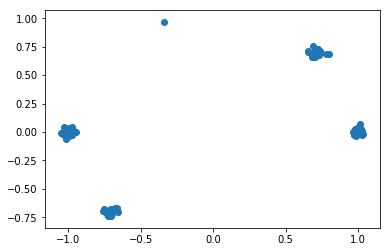

Plot 2


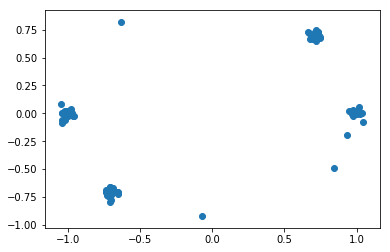

Plot 3


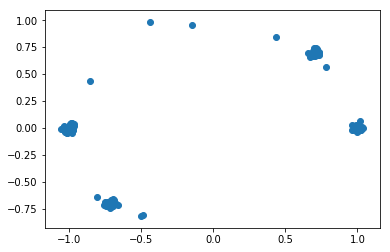

Plot 4


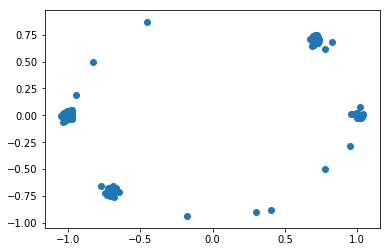


[[ 9.6683079e-01 -3.1211181e-05]
 [-6.9453788e-01 -7.0427537e-01]
 [ 7.2676033e-01  7.2858989e-01]
 ...
 [ 7.2046411e-01  6.7456609e-01]
 [ 1.0164403e+00 -2.1628000e-02]
 [ 9.5143276e-01 -2.8441343e-01]]
<NDArray 768x2 @gpu(0)>
Epoch: 3500


INFO:root:
binary training acc at epoch 3600: facc=0.747780
INFO:root:time: 1.939573
INFO:root:time: 1.940004


Epoch: 3600
epoch 3600
Plot 0


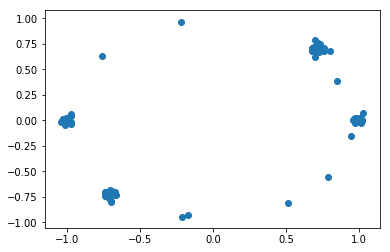

Plot 1


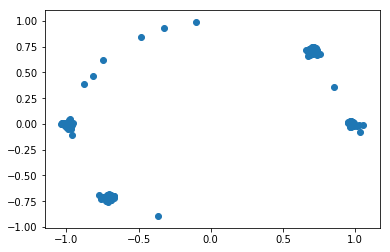

Plot 2


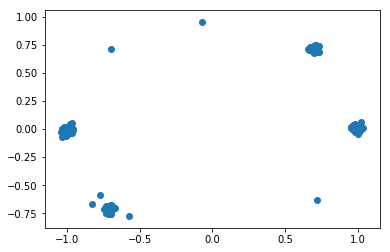

Plot 3


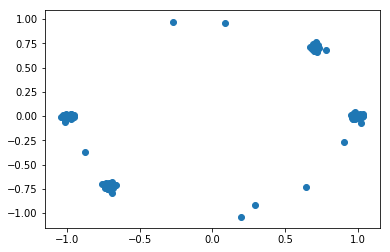

Plot 4


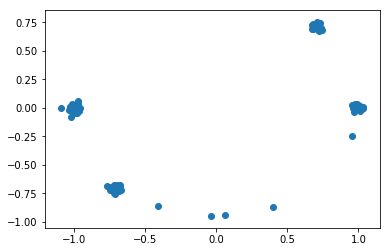


[[-0.6913383  -0.7334809 ]
 [ 0.6981359   0.6943161 ]
 [-0.99087715  0.00315387]
 ...
 [-0.6986188  -0.7299807 ]
 [ 0.71941286  0.7171918 ]
 [ 0.71568686  0.7002108 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 3700


INFO:root:
binary training acc at epoch 3800: facc=0.747734
INFO:root:time: 1.883630
INFO:root:time: 1.886563


Epoch: 3800
epoch 3800
Plot 0


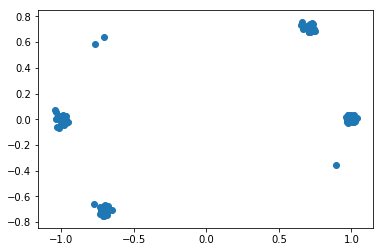

Plot 1


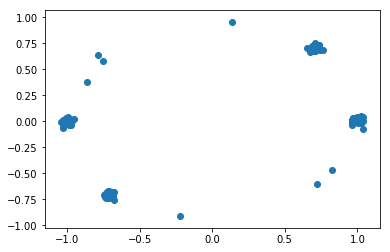

Plot 2


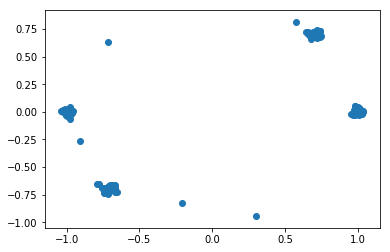

Plot 3


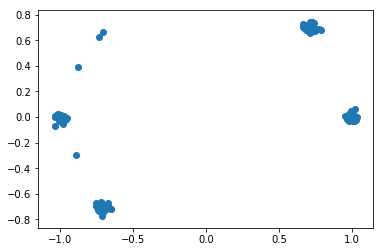

Plot 4


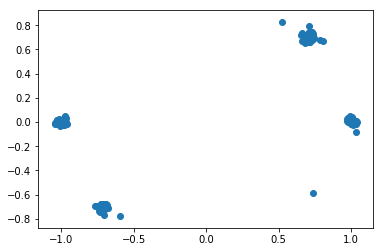


[[ 0.97870797 -0.02051434]
 [-0.7279622  -0.7411985 ]
 [-0.6772099  -0.68177205]
 ...
 [ 0.717186    0.6723904 ]
 [-0.9647908   0.03082654]
 [-0.97712046 -0.0251089 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 3900


INFO:root:
binary training acc at epoch 4000: facc=0.747849
INFO:root:time: 1.733381
INFO:root:time: 1.734196


Epoch: 4000
epoch 4000
Plot 0


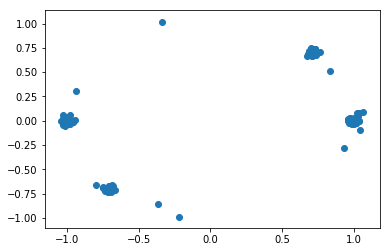

Plot 1


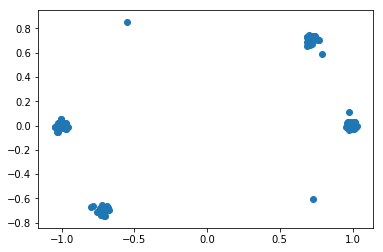

Plot 2


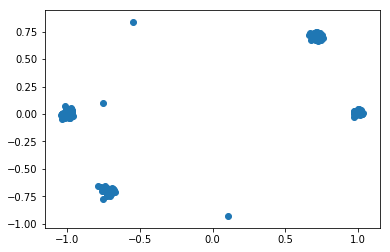

Plot 3


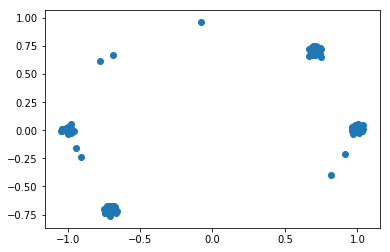

Plot 4


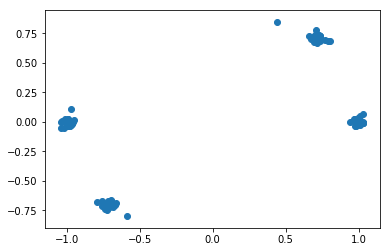


[[-1.0202092  -0.01110037]
 [-0.76632255 -0.7011648 ]
 [-0.722717   -0.68194526]
 ...
 [-0.7161978  -0.7093825 ]
 [ 0.94388974  0.00108163]
 [ 0.73219556  0.6921042 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 4100


INFO:root:
binary training acc at epoch 4200: facc=0.747917
INFO:root:time: 1.709964
INFO:root:time: 1.710356


Epoch: 4200
epoch 4200
Plot 0


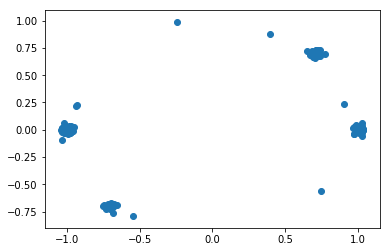

Plot 1


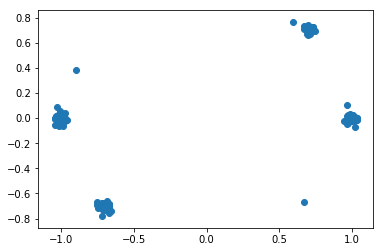

Plot 2


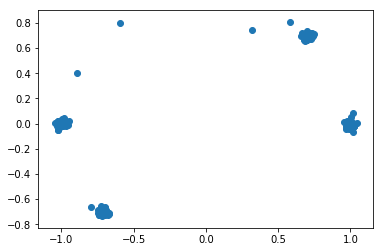

Plot 3


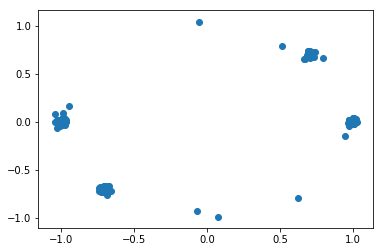

Plot 4


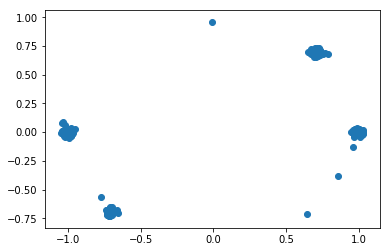


[[ 1.0202187   0.00515756]
 [ 1.0792146  -0.03680781]
 [ 0.6530872   0.72269976]
 ...
 [-1.0269059  -0.03697649]
 [ 0.96328527 -0.01167539]
 [ 0.72973365  0.6831916 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 4300


INFO:root:
binary training acc at epoch 4400: facc=0.747993
INFO:root:time: 1.740490
INFO:root:time: 1.740945


Epoch: 4400
epoch 4400
Plot 0


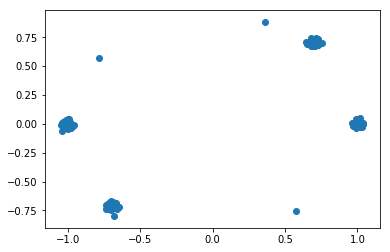

Plot 1


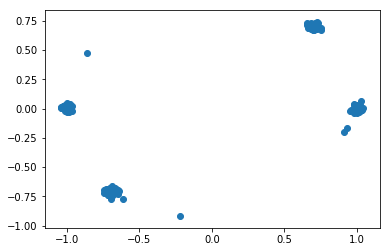

Plot 2


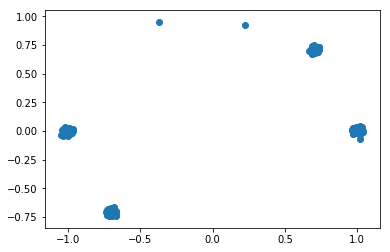

Plot 3


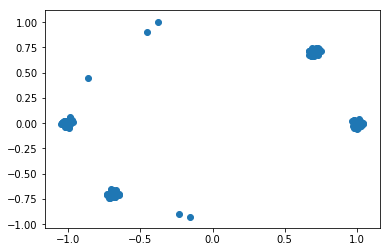

Plot 4


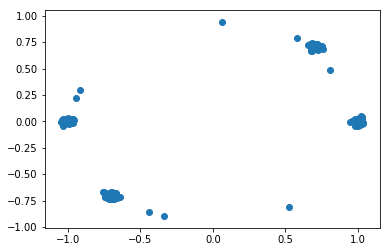


[[ 0.67489815  0.6971943 ]
 [ 1.0222062   0.02184602]
 [ 1.0020434   0.00336679]
 ...
 [ 0.75103176  0.7109996 ]
 [-0.70707446 -0.6921994 ]
 [-0.7060413  -0.7203688 ]]
<NDArray 768x2 @gpu(0)>
Epoch: 4500


INFO:root:
binary training acc at epoch 4600: facc=0.747993
INFO:root:time: 1.706240
INFO:root:time: 1.706745


Epoch: 4600
epoch 4600
Plot 0


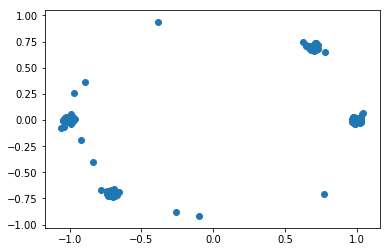

Plot 1


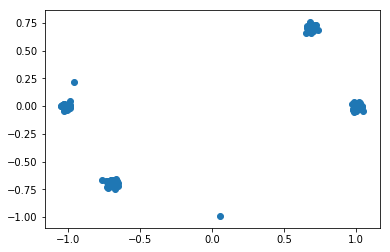

Plot 2


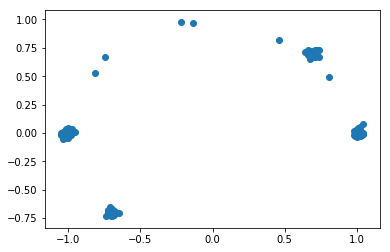

Plot 3


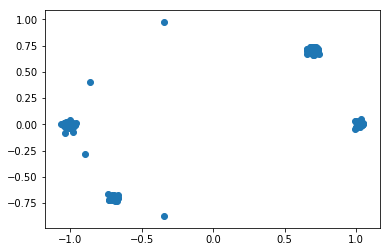

Plot 4


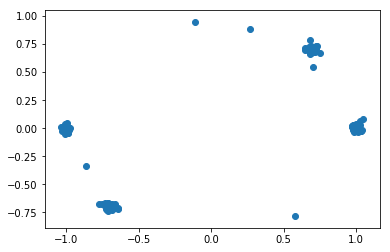


[[-0.7083054  -0.72873294]
 [ 0.9844592  -0.04490133]
 [-0.693853   -0.6915079 ]
 ...
 [-0.69611114 -0.7119437 ]
 [-0.9905943  -0.04388639]
 [ 1.0478187   0.07998351]]
<NDArray 768x2 @gpu(0)>
Epoch: 4700


INFO:root:
binary training acc at epoch 4800: facc=0.747917
INFO:root:time: 1.702406
INFO:root:time: 1.702988


Epoch: 4800
epoch 4800
Plot 0


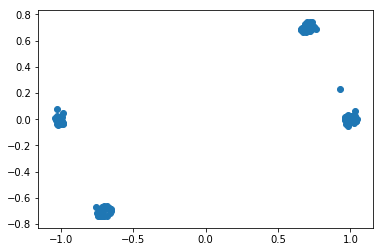

Plot 1


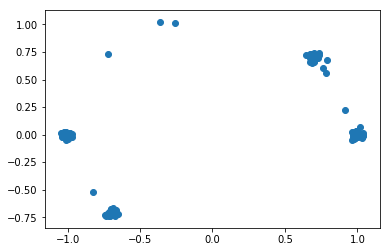

Plot 2


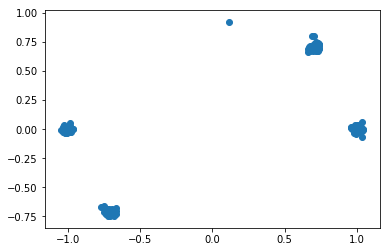

Plot 3


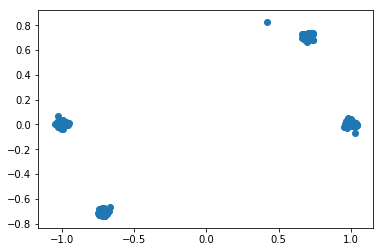

Plot 4


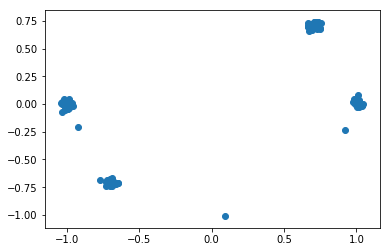


[[ 0.7026489   0.73551184]
 [-0.998686    0.03188838]
 [ 0.66179466  0.7161854 ]
 ...
 [-0.704532   -0.74107325]
 [ 0.7579626   0.7287489 ]
 [ 1.0009824  -0.02254824]]
<NDArray 768x2 @gpu(0)>
Epoch: 4900


INFO:root:
binary training acc at epoch 5000: facc=0.748108
INFO:root:time: 1.762178
INFO:root:time: 1.762665


Epoch: 5000
epoch 5000
Plot 0


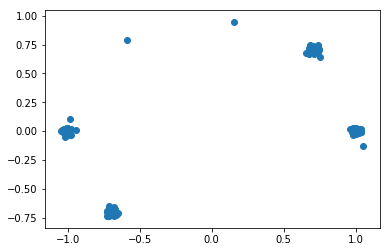

Plot 1


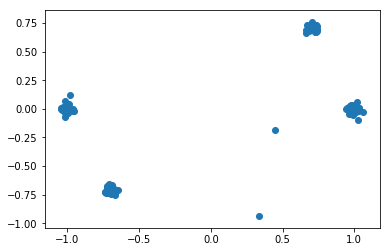

Plot 2


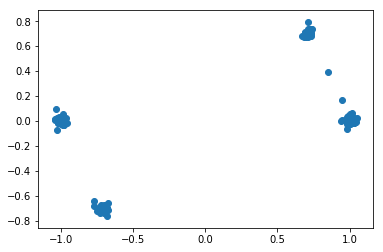

Plot 3


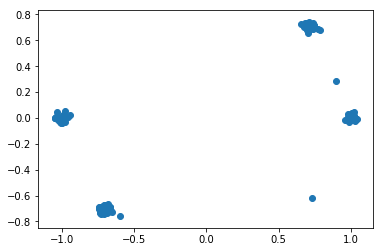

Plot 4


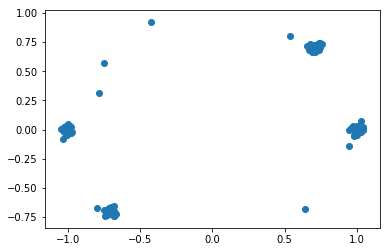


[[ 0.99093705 -0.02501732]
 [ 0.7053863   0.71919453]
 [ 0.722429    0.66197103]
 ...
 [-0.71566135 -0.6747821 ]
 [-0.97414714 -0.026227  ]
 [ 1.0153987  -0.01398307]]
<NDArray 768x2 @gpu(0)>


In [11]:
from datetime import datetime
import time
import logging

real_label = nd.ones((batch_size * 4,), ctx = ctx)
fake_label = nd.zeros((batch_size * 4,), ctx = ctx)

def facc(label, pred):
    pred = pred.ravel()
    label = label.ravel()
    return ((pred>0.5) == label).mean()
metric = mx.metric.CustomMetric(facc)


stamp =  datetime.now().strftime('%Y_%m_%d-%H_%M')
logging.basicConfig(level=logging.DEBUG)
print("Begin")


#set up Discriminator first

for i in range(100):
    tic = time.time()
    btic = time.time()
    train_data.reset()
    iter = 0
    #print("RUNNING")
    for batch1 in train_data:
        batch2 = next(train_data, batch1)
        batch3 = next(train_data, batch1)
        batch4 = next(train_data, batch1)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        data = (mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0], dim = 0)).as_in_context(ctx)
        
        #test new shape for data
        
        
        
        #print(data)
        #if iter == 0:
            #x = data.T[0].asnumpy().tolist()
            #y = data.T[1].asnumpy().tolist()
            #print(x)
            #print(y)
            #plt.scatter(x,y)
            #plt.show()
            
        
        
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        real_label_noise = mx.ndarray.add(real_label, noise)
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        fake_label_noise = mx.ndarray.add(fake_label, noise)
        #print("TESTING 123")
        #print(real_label_noise)
        #print(fake_label_noise)
        #print("THIS IS A CHECK")
        #print(data)
        #print(len(data))
        #print(len(data[0]))
        #print(len(data[0][0]))
        #print(len(batch1.data[0]))
        #print(len(batch1.data[0][0]))
        #print(len(batch1.data[0][0][0]))
        #print(len(batch2.data[0]))
        #print(len(batch2.data[0][0]))
        #print(len(batch2.data[0][0][0]))
        #print(data)
        
        
        latent_z1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z2 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z3 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z4 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)

        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD1(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD1_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label,], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)
            
            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)
            

            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print(fake)
            #print(fake)
            #print("TESTING")
            #print(len(fake))
            output = netD1(fake.detach()).reshape((-1, 1))
            errD1_fake = loss(output, fake_label_noise)
            errD1 = errD1_real + errD1_fake
            errD1.backward()
            metric.update([fake_label,], [output,])

        trainerD1.step(data.shape[0])
        
        with autograd.record():
            # train with real image
            #print("Real Data")
            #print(data)
            output = netD2(data).reshape((-1, 1))
            #print("Output of Discriminator")
            #print(output)
            errD2_real = loss(output, real_label_noise)
            #print("This is the guess for real")
            #print(output)
            metric.update([real_label,], [output,])

            # train with fake image
            firstFake = netG(latent_z1)
            secondFake = netG(latent_z2)
            thirdFake = netG(latent_z3)
            fourthFake = netG(latent_z4)
            #print("testing 1")
            #print(firstFake)
            
            #only add if using dense
            #firstFake = firstFake.reshape((128, 1, 2))
            #secondFake = secondFake.reshape((128, 1, 2))  
            #print("testing 2")
            #print(firstFake)
            

            fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
            #print("TESTING")
            #print(len(fake))
            output = netD2(fake.detach()).reshape((-1, 1))
            errD2_fake = loss(output, fake_label_noise)
            errD2 = errD2_real + errD2_fake
            errD2.backward()
            metric.update([fake_label,], [output,])

        trainerD2.step(data.shape[0])
        
        
        
    name, acc = metric.get()
    metric.reset()
    
# print("Done setting up Discriminator")
for epoch in range(epochs+1):
    train_data.reset()
    tic = time.time()
    btic = time.time()
    count = 0
    iter = 0
    #print("RUNNING")
    for batch1 in train_data:
        batch2 = next(train_data, batch1)
        batch3 = next(train_data, batch1)
        batch4 = next(train_data, batch1)
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################

        data = (mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0], dim = 0)).as_in_context(ctx)
        #if count == 0:
            #print("Real DATA")
            #x = 
            #plt.scatter(x,y)
            #plt.show()
            
            
            #print("END of Real Data")
        
        
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        real_label_noise = mx.ndarray.add(real_label, noise)
        noise = mx.ndarray.random_normal(0, 0.1, batch_size * 4, ctx = ctx)
        fake_label_noise = mx.ndarray.add(fake_label, noise)
        #print("THIS IS A CHECK")
        #print(data)
        #print(len(data))
        #print(len(data[0]))
        #print(len(data[0][0]))
        #print(len(batch1.data[0]))
        #print(len(batch1.data[0][0]))
        #print(len(batch1.data[0][0][0]))
        #print(len(batch2.data[0]))
        #print(len(batch2.data[0][0]))
        #print(len(batch2.data[0][0][0]))
        #print(data)
        
        
        latent_z1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z2 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z3 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        latent_z4 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        if True:#epoch%2 == 0):
            with autograd.record():
                # train with real image
                #print("Real Data")
                #print(data)
                output = netD1(data).reshape((-1, 1))
                #print("Output of Discriminator")
                #print(output)
                errD1_real = loss(output, real_label_noise)
                #print("This is the guess for real")
                #print(output)
                metric.update([real_label], [output,])

                # train with fake image
                firstFake = netG(latent_z1)
                secondFake = netG(latent_z2)
                thirdFake = netG(latent_z3)
                fourthFake = netG(latent_z4)
                #print("testing 1")
                #print(firstFake)

                #only add if using dense
                #firstFake = firstFake.reshape((128, 1, 2))
                #secondFake = secondFake.reshape((128, 1, 2))  
                #print("testing 2")
                #print(firstFake)


                fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
                #print("TESTING")
                #print(len(fake))
                output = netD1(fake.detach()).reshape((-1, 1))
                errD1_fake = loss(output, fake_label_noise)
                errD1 = errD1_real + errD1_fake
                errD1.backward()
                metric.update([fake_label,], [output,])

            trainerD1.step(data.shape[0])
        elif True :
            with autograd.record():
                # train with real image
                #print("Real Data")
                #print(data)
                output = netD2(data).reshape((-1, 1))
                #print("Output of Discriminator")
                #print(output)
                errD2_real = loss(output, real_label_noise)
                #print("This is the guess for real")
                #print(output)
                metric.update([real_label], [output,])

                # train with fake image
                firstFake = netG(latent_z1)
                secondFake = netG(latent_z2)
                thirdFake = netG(latent_z3)
                fourthFake = netG(latent_z4)
                #print("testing 1")
                #print(firstFake)

                #only add if using dense
                #firstFake = firstFake.reshape((128, 1, 2))
                #secondFake = secondFake.reshape((128, 1, 2))  
                #print("testing 2")
                #print(firstFake)


                fake = mx.ndarray.concat(firstFake, secondFake, thirdFake, fourthFake, dim = 0)
                #print("TESTING")
                #print(len(fake))
                output = netD2(fake.detach()).reshape((-1, 1))
                errD2_fake = loss(output, fake_label_noise)
                errD2 = errD2_real + errD2_fake
                errD2.backward()
                metric.update([fake_label,], [output,])

            trainerD2.step(data.shape[0])
            
            
        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        with autograd.record():
            fake1 = netG(latent_z1)
            fake2 = netG(latent_z2)
            fake3 = netG(latent_z3)
            fake4 = netG(latent_z4)
            #print(fake1)
            #rint(fake1.T)
            #print(fake1.T[0])
           # print(fake1.T[0][1])
            
            
            #only add if using dense
            #fake1 = fake1.reshape((128, 1, 2))
            #fake2 = fake2.reshape((128, 1, 2))
            
            output = netD1(mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)).reshape((-1, 1))
            errG = loss(output, real_label_noise)
            errG.backward()

        trainerG.step(mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0]).shape[0])
        
        with autograd.record():
            fake1 = netG(latent_z1)
            fake2 = netG(latent_z2)
            fake3 = netG(latent_z3)
            fake4 = netG(latent_z4)
            #print(fake1)
            #rint(fake1.T)
            #print(fake1.T[0])
           # print(fake1.T[0][1])
            
            
            #only add if using dense
            #fake1 = fake1.reshape((128, 1, 2))
            #fake2 = fake2.reshape((128, 1, 2))
            
            output = netD2(mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)).reshape((-1, 1))
            errG = loss(output, real_label_noise)
            errG.backward()

        trainerG.step(mx.ndarray.concat(batch1.data[0], batch2.data[0], batch3.data[0], batch4.data[0]).shape[0])
        
        
        

        # Print log infomation every ten batches
        if iter % 10 == 0:
            name, acc = metric.get()
            #logging.firstFake info('speed: {} samples/s'.format(batch_size / (time.time() - btic)))
            #logging.info('discriminator loss = %f, generator loss = %f, binary training acc = %f at iter %d epoch %d'
            #         %(nd.mean(errD).asscalar(),
            #           nd.mean(errG).asscalar(), acc, iter, epoch))
        iter = iter + 1
        btic = time.time()

    name, acc = metric.get()
    if acc == 1.0 and epoch >201:
        print("FAIL")
        sys.exit("D too good")
    metric.reset()
    #logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
    #logging.info('time: %f' % (time.time() - tic))

    #Visualize one generated image for each epoch
    fake_img = fake1[0]
    #print("testing")
    #print("Fake data")
    #print(fake1)
    ##print("fake data transposed")
    #print(fake1.T)
    #print(len(fake))0
    #print(len(fake[0]))
    #print(len(fake[0][0]))
    #print(fake)
    
    
    #test small print
    #print("epoch %d" % (epoch))
    #print("X: %s   Y: %s  " % (fake_img[0][0],fake_img[0][1]))
    #x= fake.T[0][0].asnumpy().tolist()
    #y = fake.T[1][0].asnumpy().tolist()
    #print("Plot")
    #plt.scatter(x,y)
    #plt.show()
    
    
    
    
    #real print
    if(epoch%100 ==0):
        print("Epoch: %d" % epoch)
    if(epoch%200 == 0):# or epoch % 200 == 1 or epoch % 200 == 2 or epoch % 200 == 3):
        logging.info('\nbinary training acc at epoch %d: %s=%f' % (epoch, name, acc))
        logging.info('time: %f' % (time.time() - tic))
        logging.info('time: %f' % (time.time() - tic))
        print("epoch %d" % (epoch))
        
        #For convolution?
        #print("X: %s   Y: %s  " % (fake_img[0][0],fake_img[0][1]))
        #x= fake1.T[0][0].asnumpy().tolist()
        #y = fake1.T[0][1].asnumpy().tolist()
        latent1 = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
        fake = netG(latent1)
        for i in range(5):
            latent = mx.nd.random_normal(loc = 0, scale = 3, shape=(batch_size, latent_z_size, 2), ctx=ctx)
            fakeadd = netG(latent)
            x = fakeadd.T[0].asnumpy().tolist()
            y = fakeadd.T[1].asnumpy().tolist()
            print("Plot %d" % i)
            plt.scatter(x,y)
            plt.show()
            fake = mx.ndarray.concat(fake, fakeadd, dim = 0)
        #fake = mx.ndarray.concat(fake1, fake2, fake3, fake4, dim = 0)
        

        #print("X: ")
        #print(fake.T[0][0])
        #print("Y: ")
        #print(fake.T[0][1])
        #print("")
        #print("")
        print(fake)


        #plt.show()   
    
    # visualize(fake_img)
    # plt.show()
